# Figure 4

Example of the dynamics per round observed in an arbitrary trial, for a model with $k\,{=}\,12$. Each row represents a round $t$ (with $t=84,\ldots, 89$) in a typical trial taken from the 100 simulations. The left panel presents the distribution of the predictions $s(t)$ of the active predictors of the agents. The middle panel shows the number of agents who make either the decision to go or not to go to the bar. The right panel shows the distribution of the distances between the predictions and the attendance of the round, that is $\mid s(t)-A_t\mid$ for each active predictor $s$.  The solid curves in the left and right columns is the kernel density estimate of the distributions.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../el_farol')

from main import main
from data_utils import IQR
from config import PATHS

In [2]:
def Figure4(seed=42, to_file=False):
    num_rounds = 100
    ks=[12]
    df = main(
        ks=ks,
        ds=[24],
        num_rounds=num_rounds,
        num_experiments=1,
        seed=seed
    )
    df['Prediction_lag'] = df.groupby(['Identifier','Agent'])['Prediction'].transform('shift',1)
    inicial = True
    n_rounds = 5
    r_ini = 84
    k = ks[0]
    fig, ax = plt.subplots(n_rounds,3, figsize=(8,2*n_rounds), tight_layout=True, dpi=300)
    fig.suptitle(f'Rounds {r_ini} through {r_ini + n_rounds - 1} (k={k})', fontsize=14)
    for r in range(n_rounds):
        if inicial:
            ax[r,0].set_title(f'Distribution of\nPredictions from\nactive predictors')
            ax[r,1].set_title(f'Decisions')
            ax[r,2].set_title('Distribution of\ndistances between\nPrediction and Attendance')
            inicial = False
        else:
            ax[r,0].set_title('')
            ax[r,1].set_title('')
            ax[r,2].set_title('')
        df1 = pd.DataFrame(df[df['Round'] == r_ini+r])
        df1['Attendance'] = df1.groupby('Identifier')['Decision'].transform('sum')
        df1['Decision1'] = df1['Decision'].apply(lambda x: 'Go' if x == 1 else 'No go')
        df1['|P-A|'] = np.abs(df1['Prediction_lag'] - df1['Attendance'])
        sns.histplot(x='Prediction_lag', data=df, kde=True, ax=ax[r,0], bins=50)
        sns.countplot(x='Decision1', order=['Go', 'No go'], data=df1, ax=ax[r,1])
        sns.histplot(x='|P-A|', data=df1, kde=True, ax=ax[r,2])
        ax[r,0].set_xlim([0,100])
        ax[r,0].set_xlabel('')
        ax[r,0].axvline(60, ls='--', color='red')
        ax[r,1].set_ylim([0,100])
        ax[r,1].set_xlabel('')              
        ax[r,1].axhline(60, ls='--', color='red')
        ax[r,1].set_ylabel('')
    #        ax[r,1].tick_params(labelleft=False)
        ax[r,2].set_xlim([0,100])
        ax[r,2].set_xlabel('')
        ax[r,2].set_ylabel('')
    #        ax[r,2].tick_params(labelleft=False)
    if to_file:
        file_name = PATHS['folder_figures_for_paper'] / 'Figure4.png'
        fig.savefig(file_name, dpi=300, bbox_inches='tight')

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/1 [00:00<?, ?it/s]

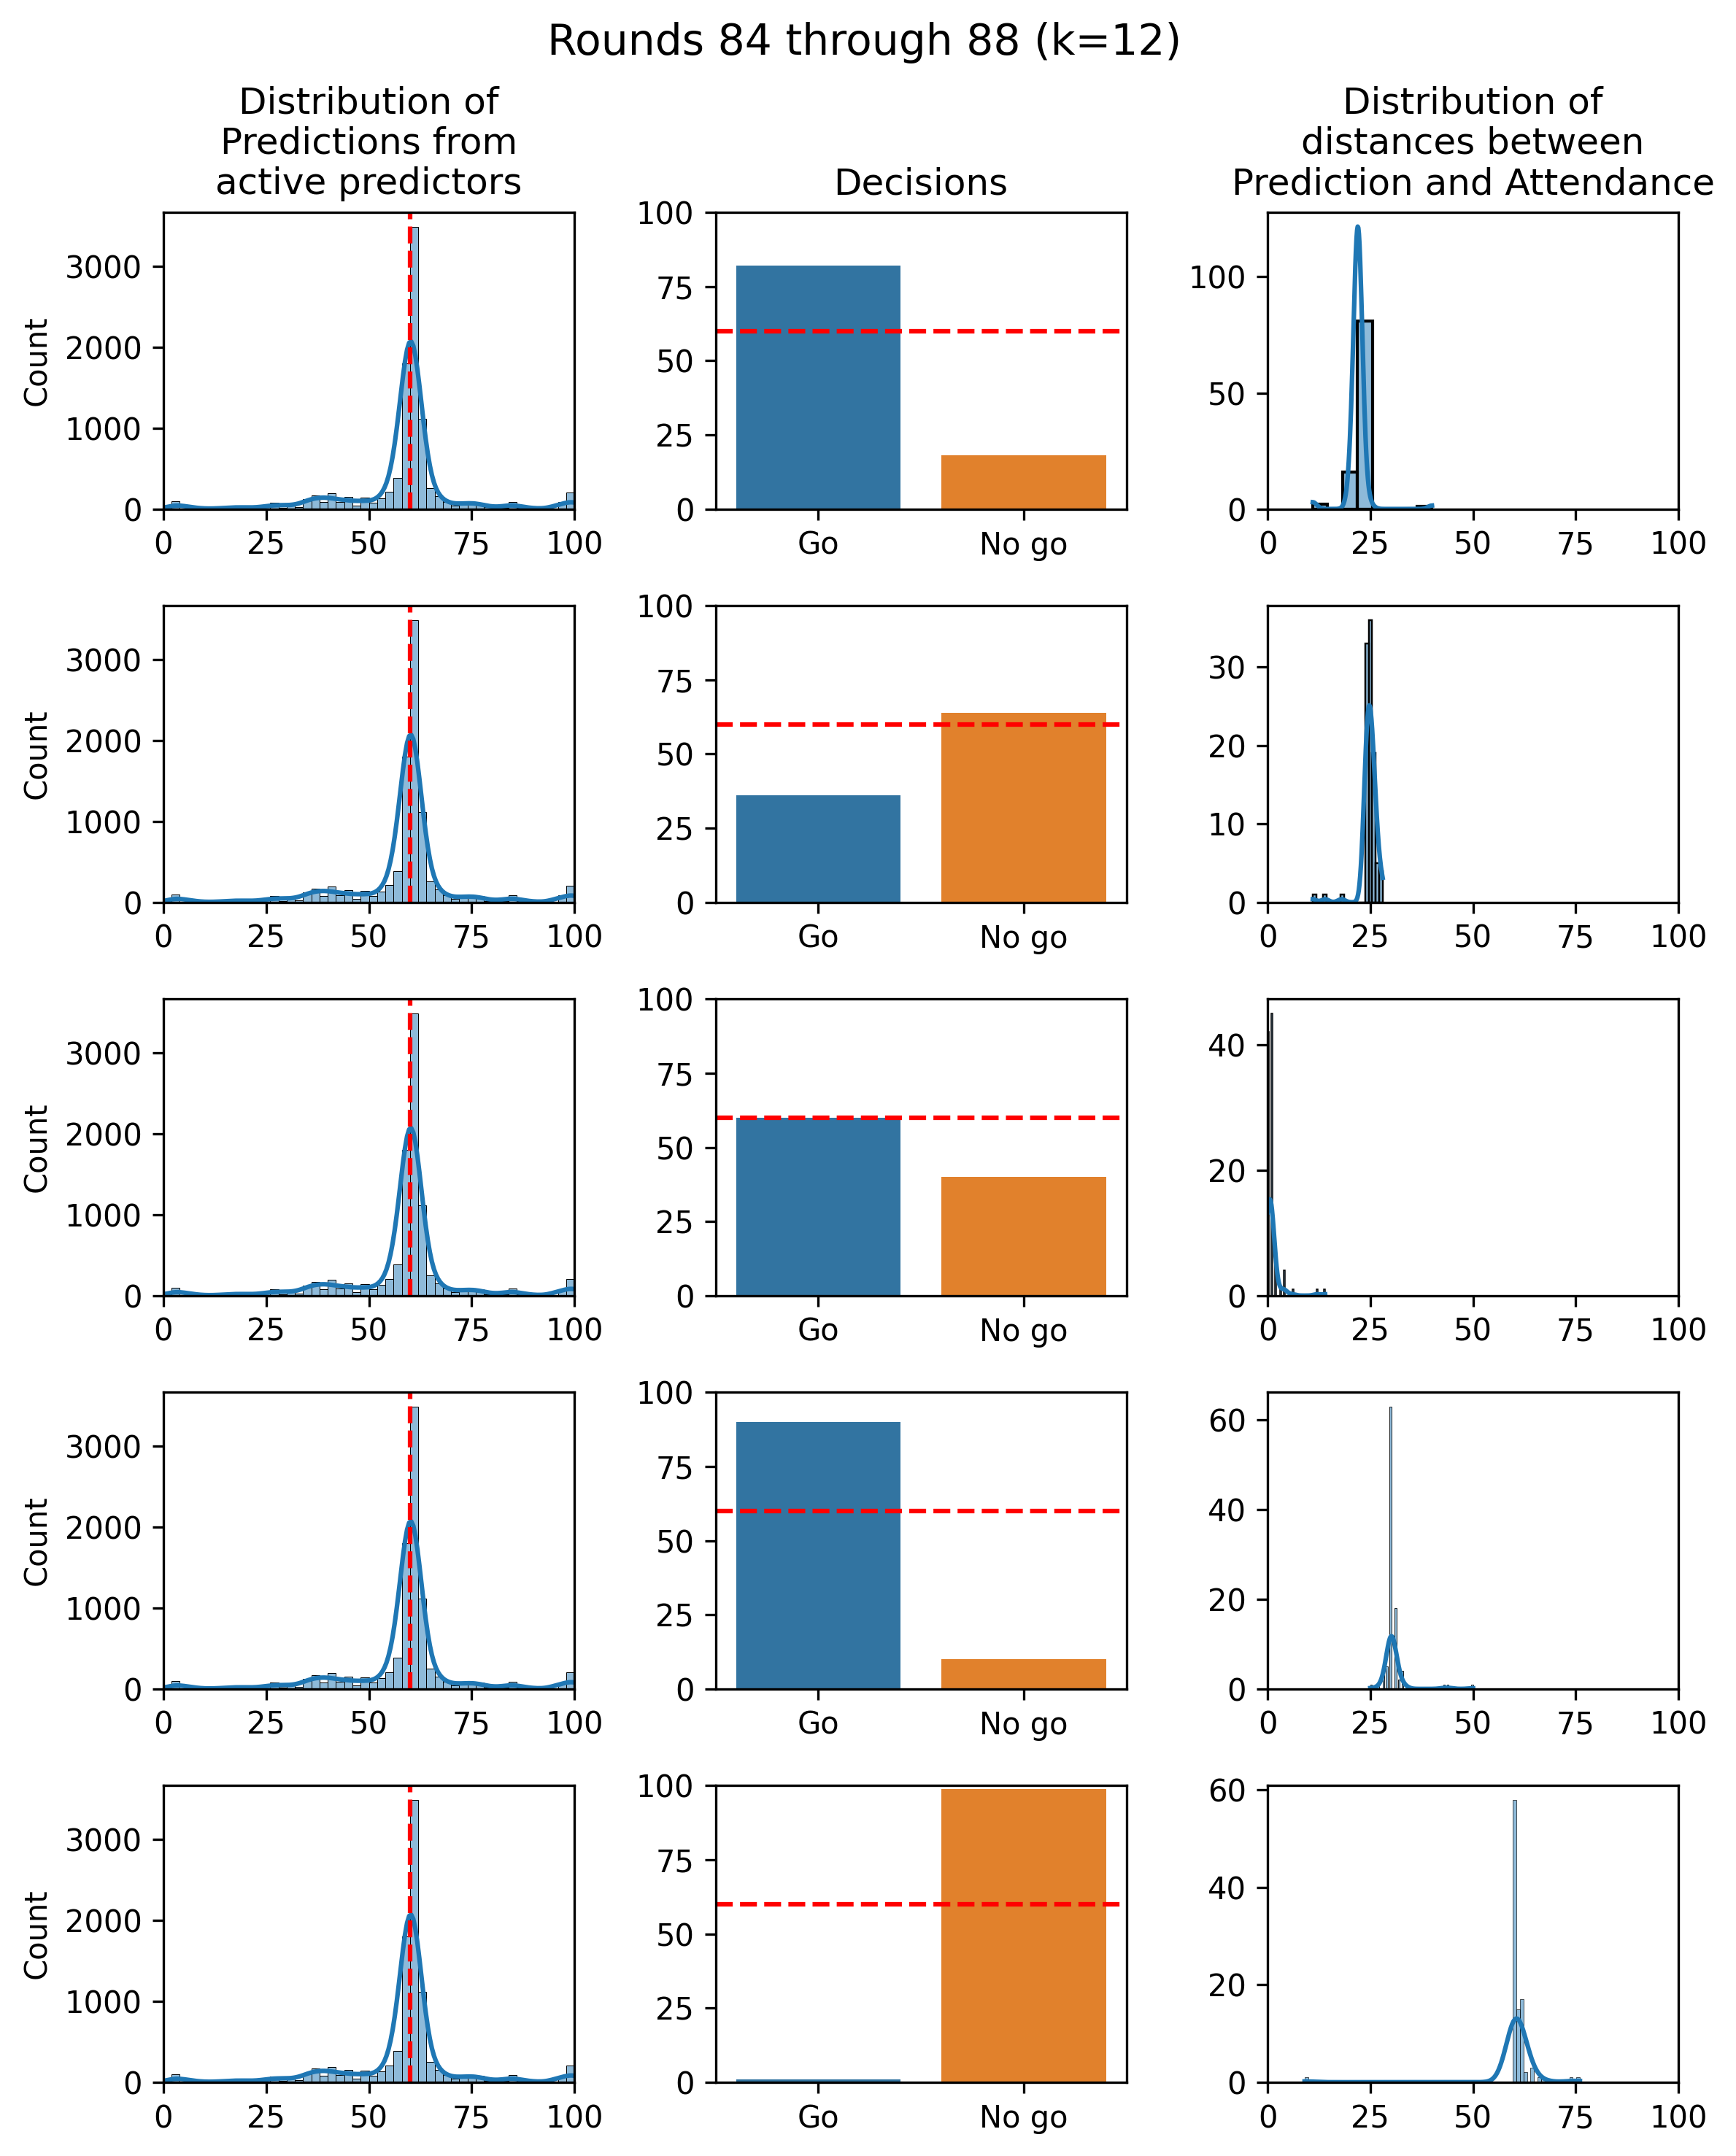

In [10]:
Figure4(seed=46, to_file=True)

### Measuring the IQR

In [13]:
df = main(
    ks=[12],
    ds=[24],
    num_rounds=100,
    num_experiments=1,
    seed=46
)

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
df1 = df[(df['Round'] >= 84) & (df['Round'] < 89)]
df1.groupby(['Round'])['Prediction'].apply(lambda grp: IQR(grp.values)).mean()

1.4

### Check results with different seeds

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/1 [00:00<?, ?it/s]

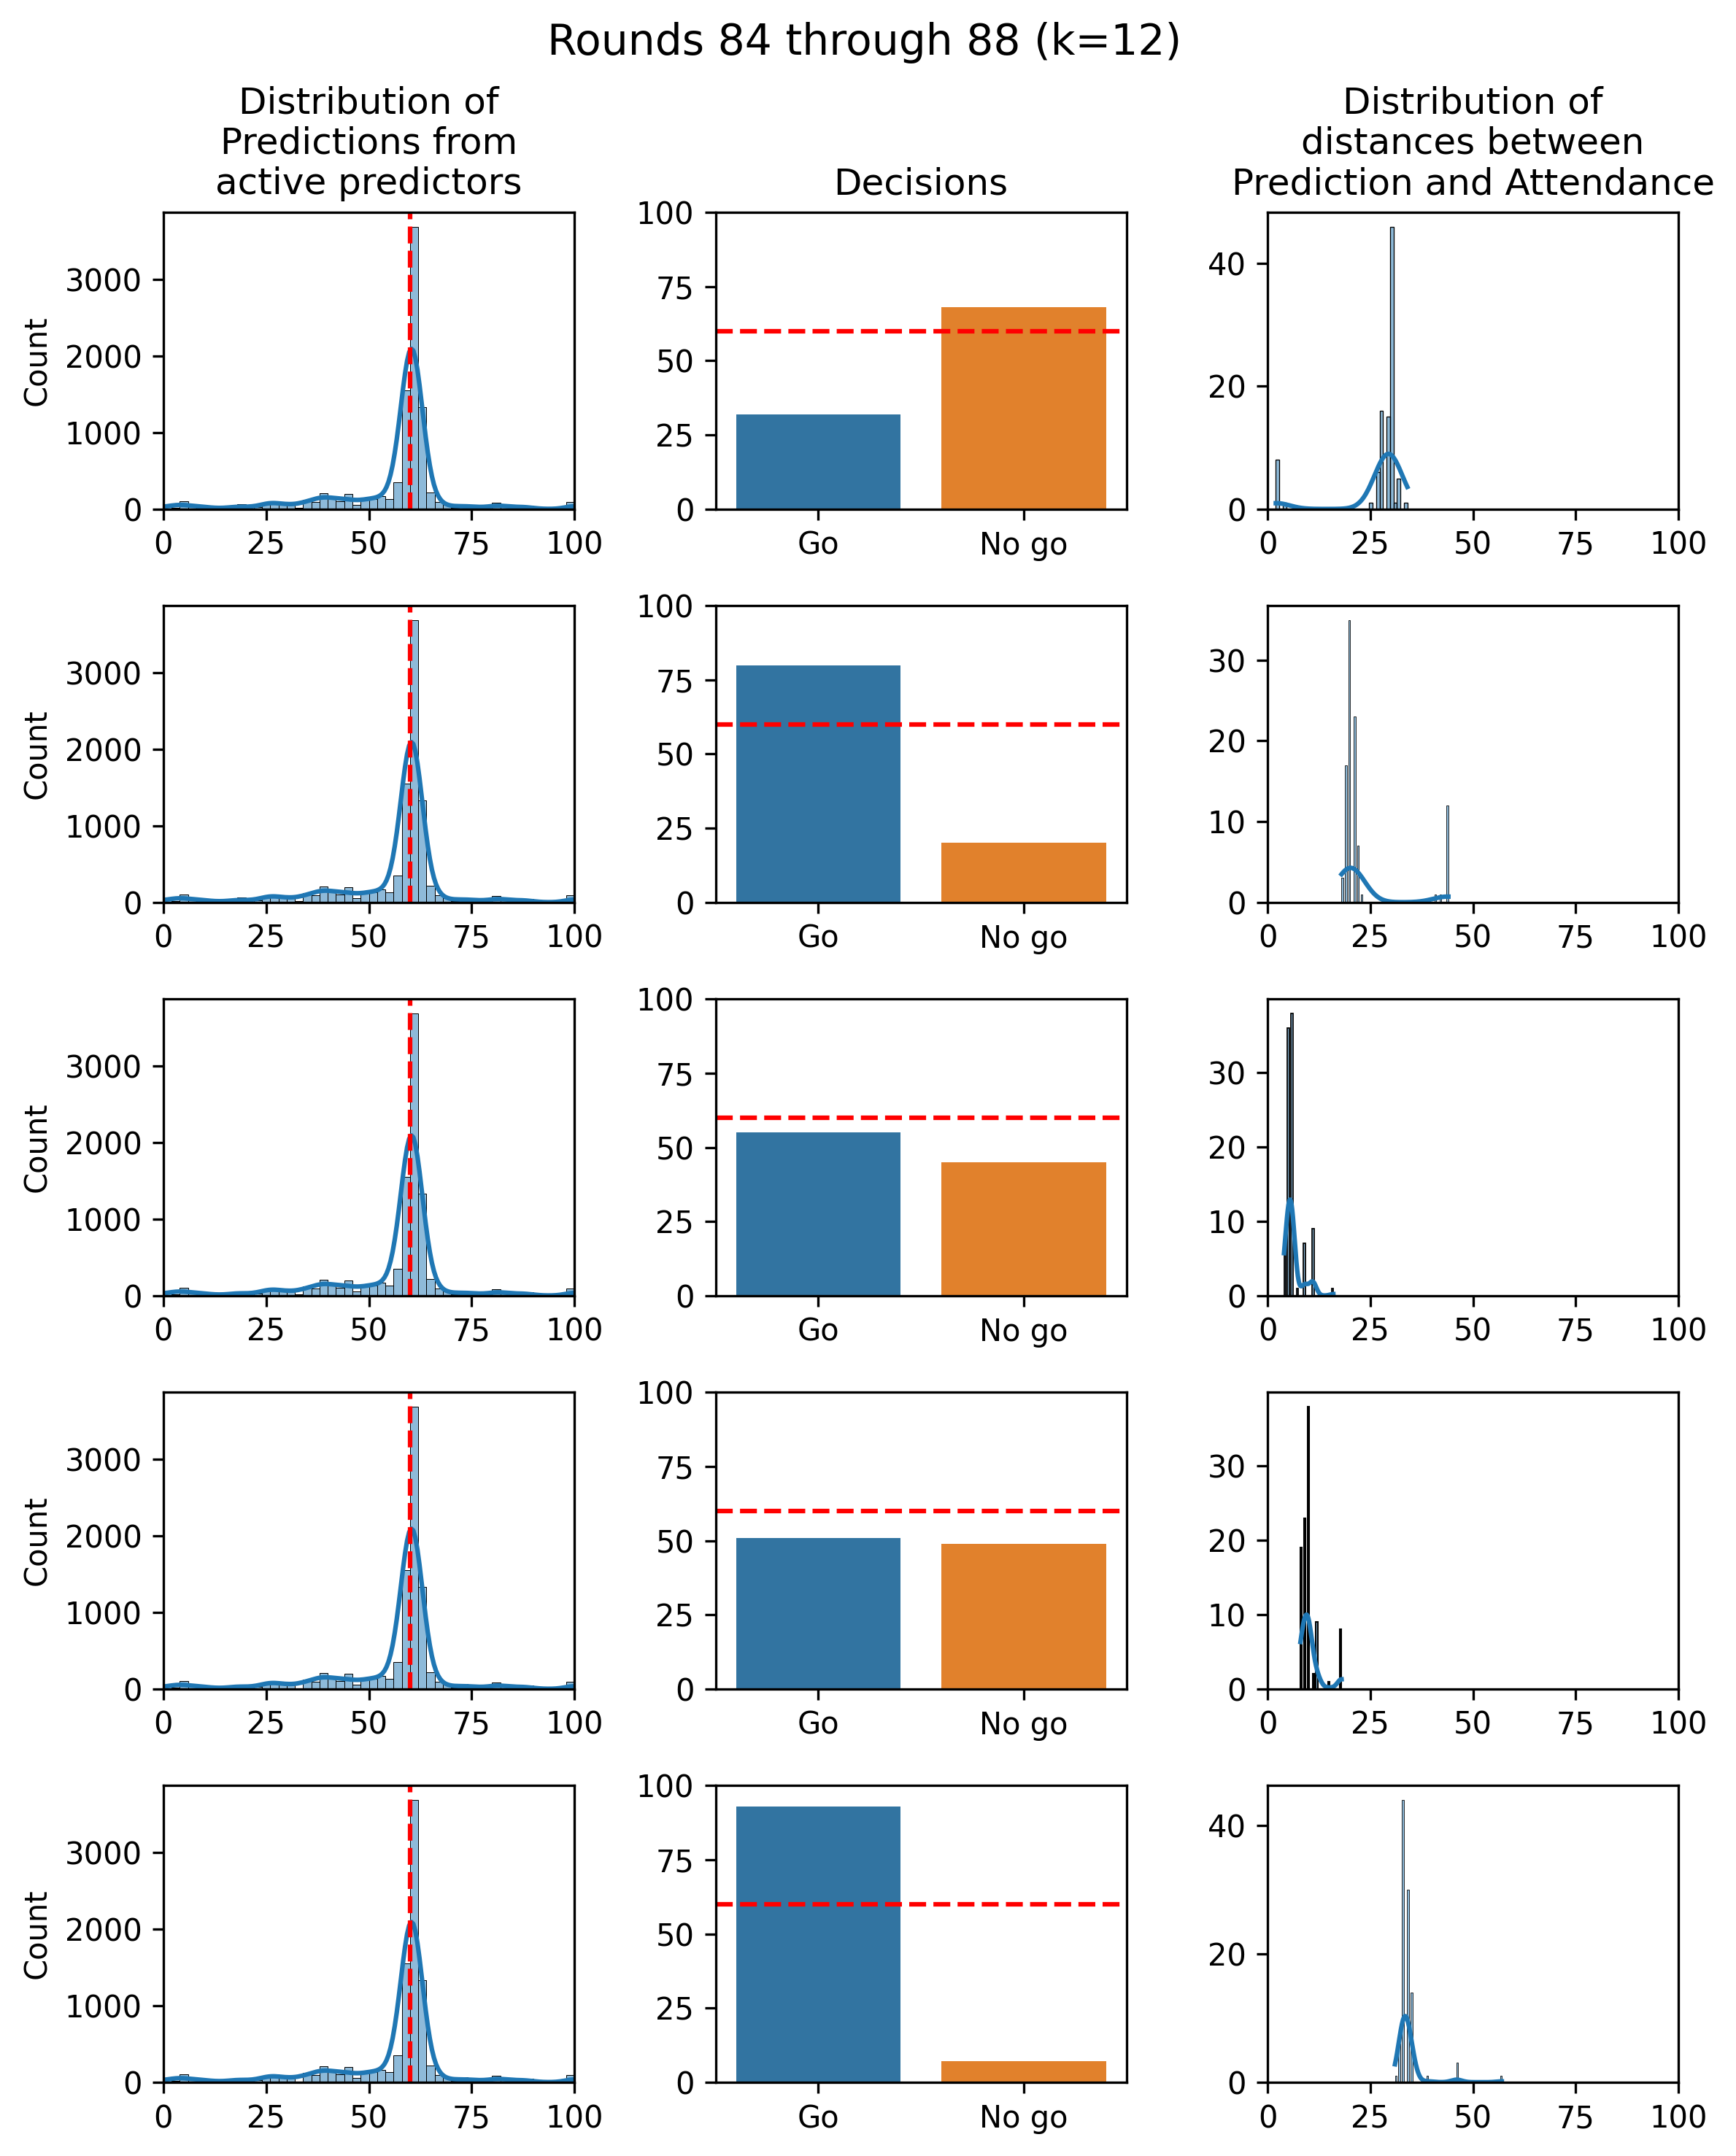

In [ ]:
Figure4(seed=43)

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/1 [00:00<?, ?it/s]

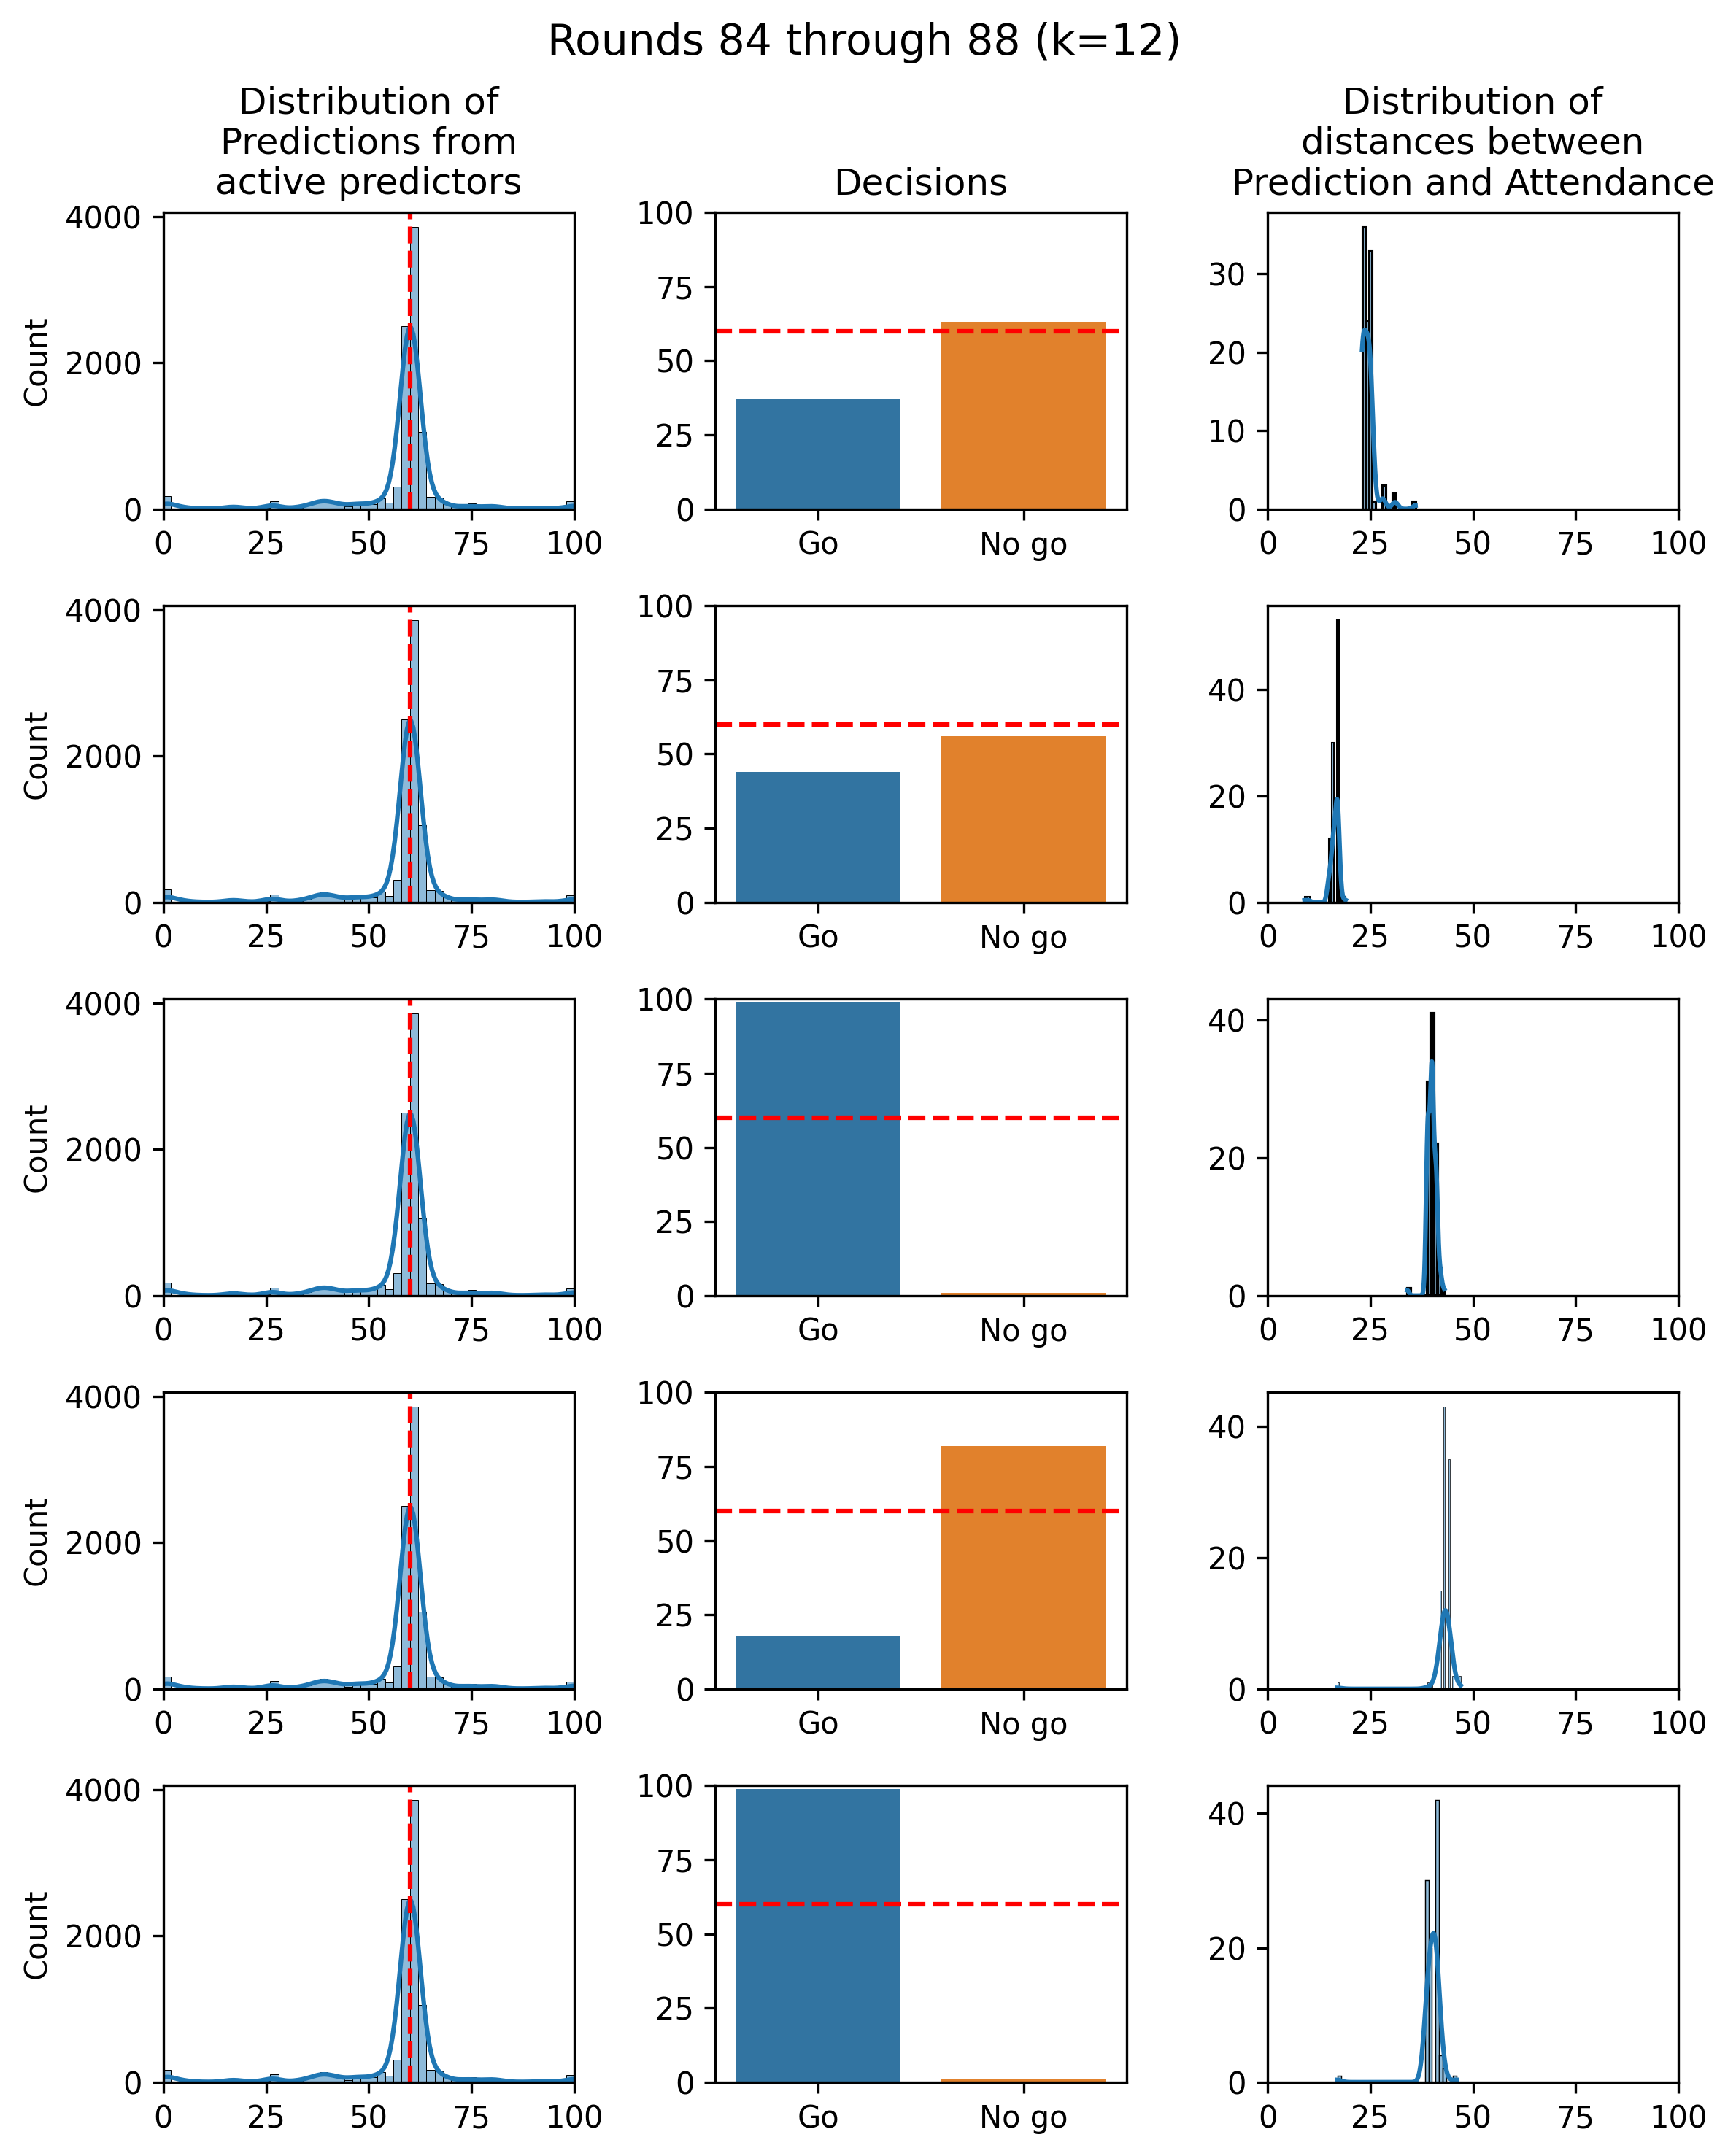

In [ ]:
Figure4(seed=42)

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/1 [00:00<?, ?it/s]

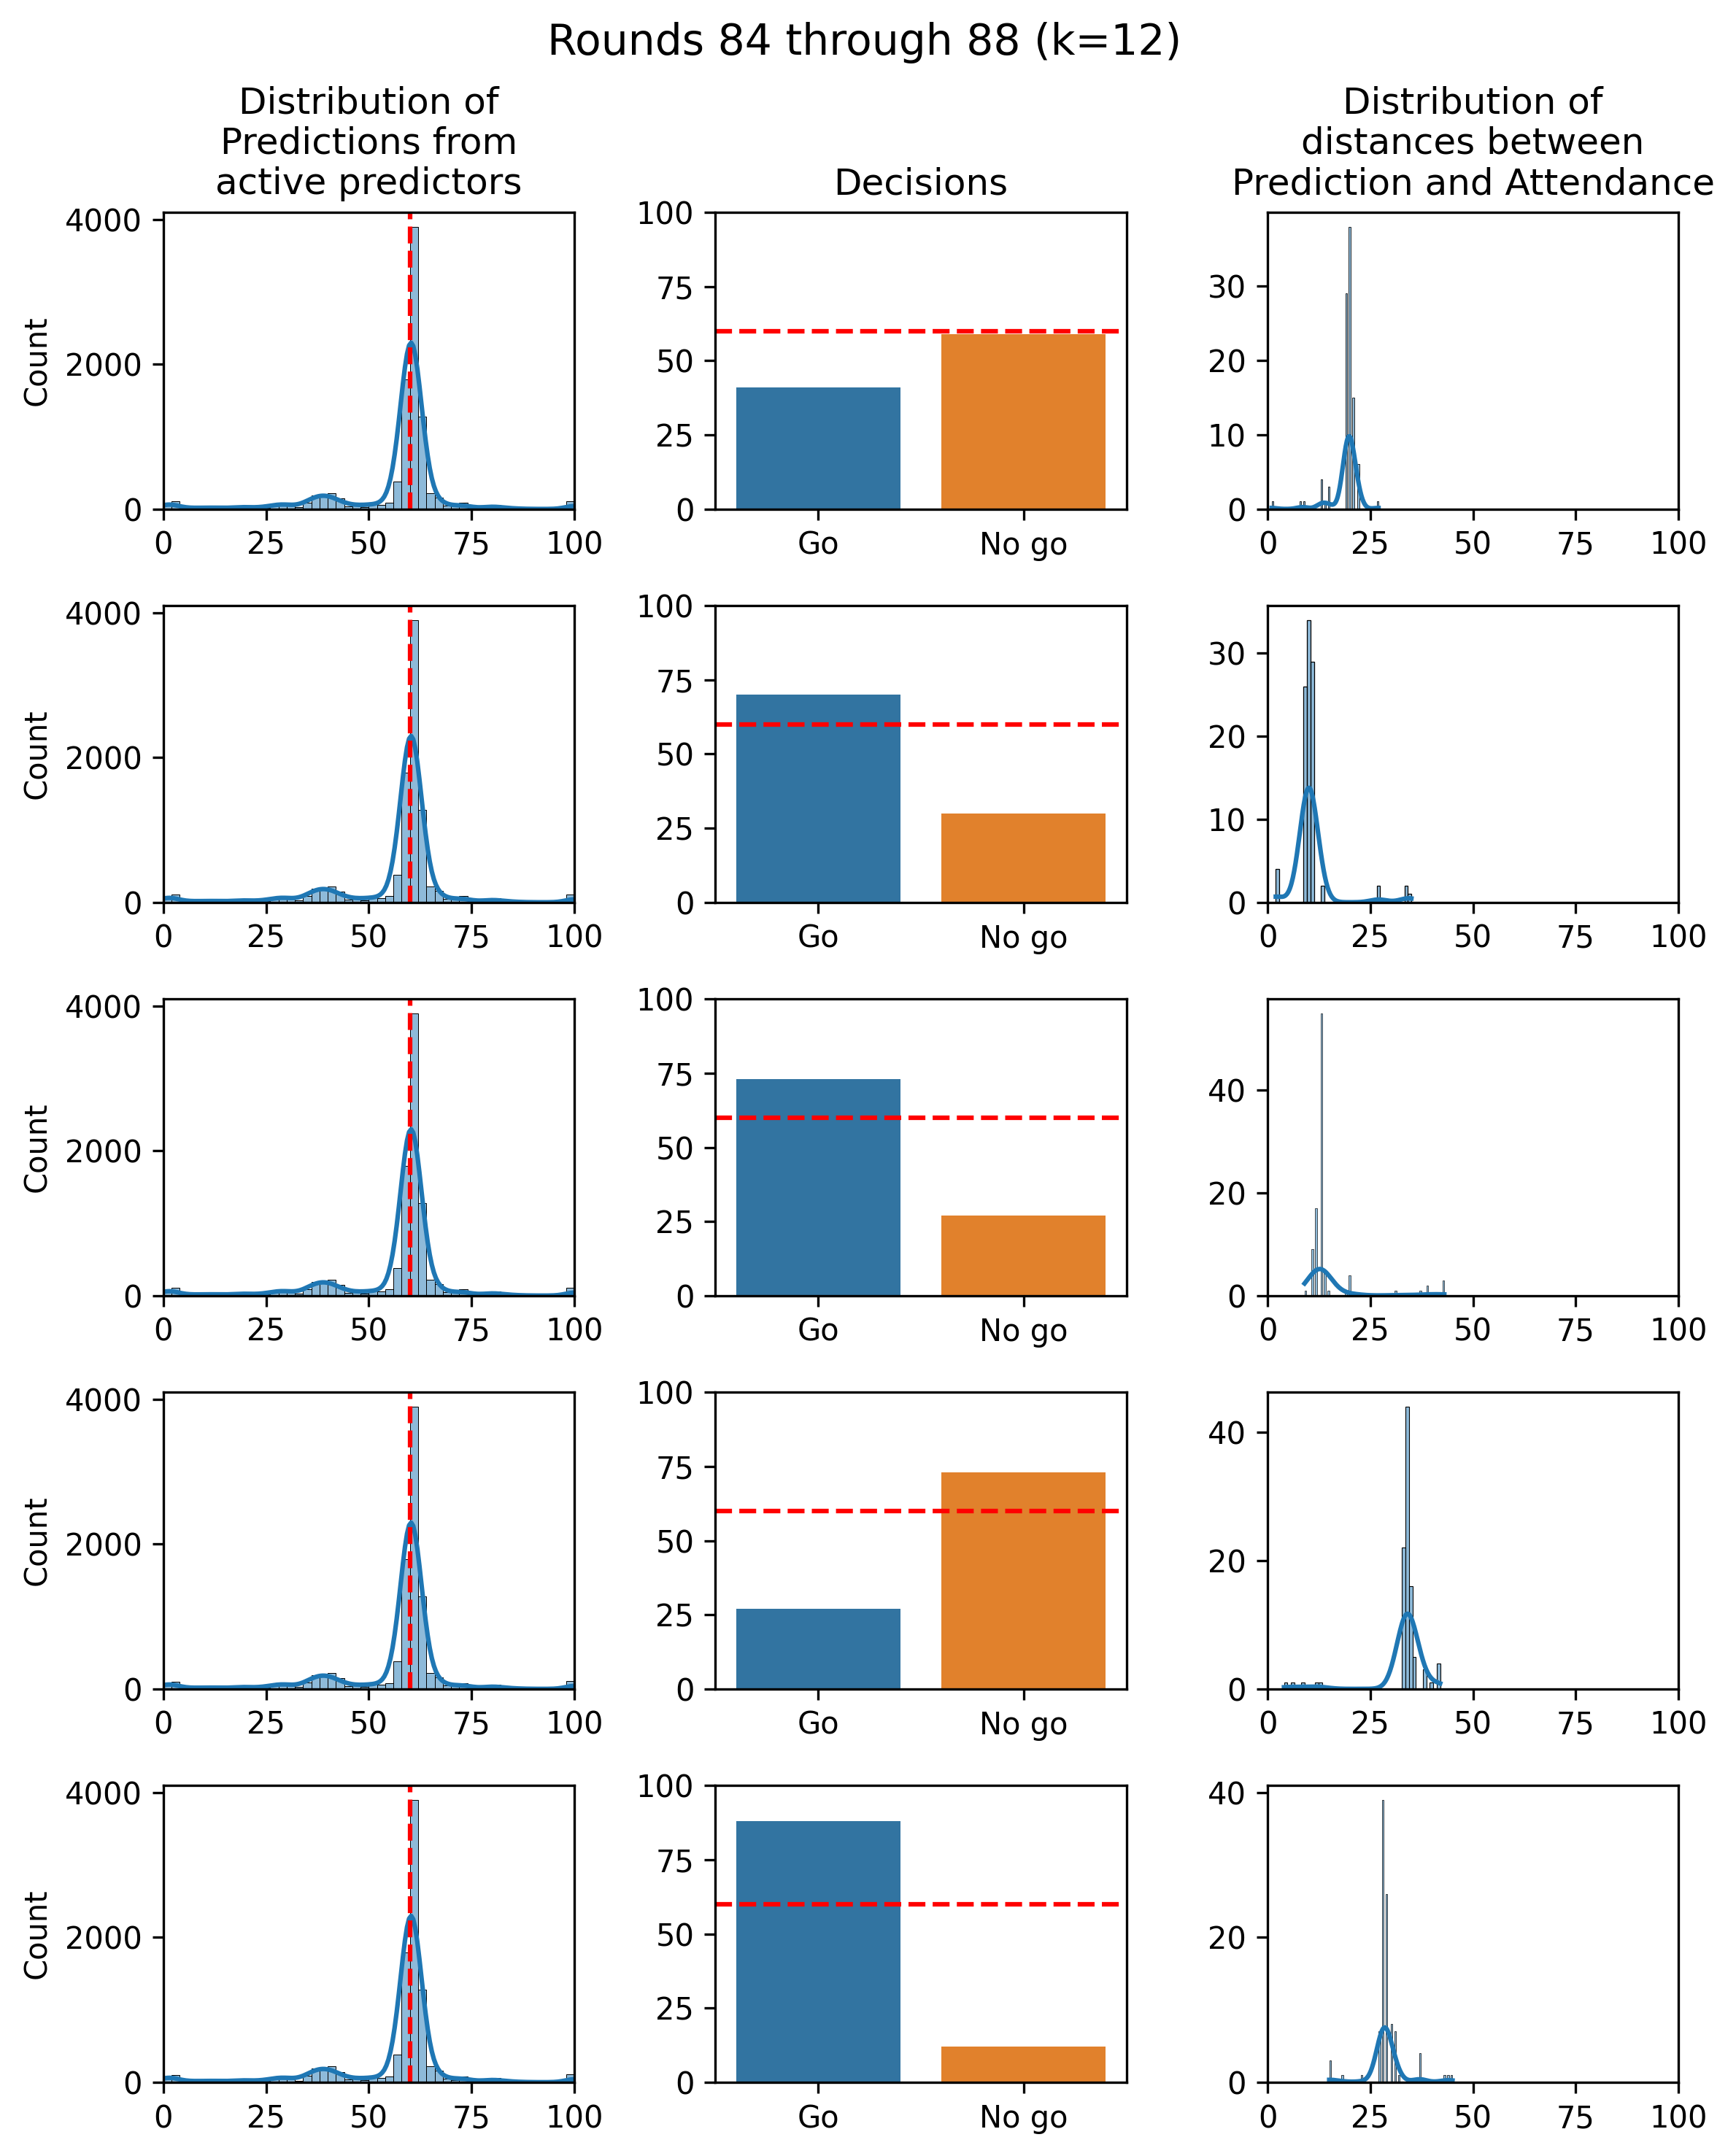

In [6]:
Figure4(seed=45)

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/1 [00:00<?, ?it/s]

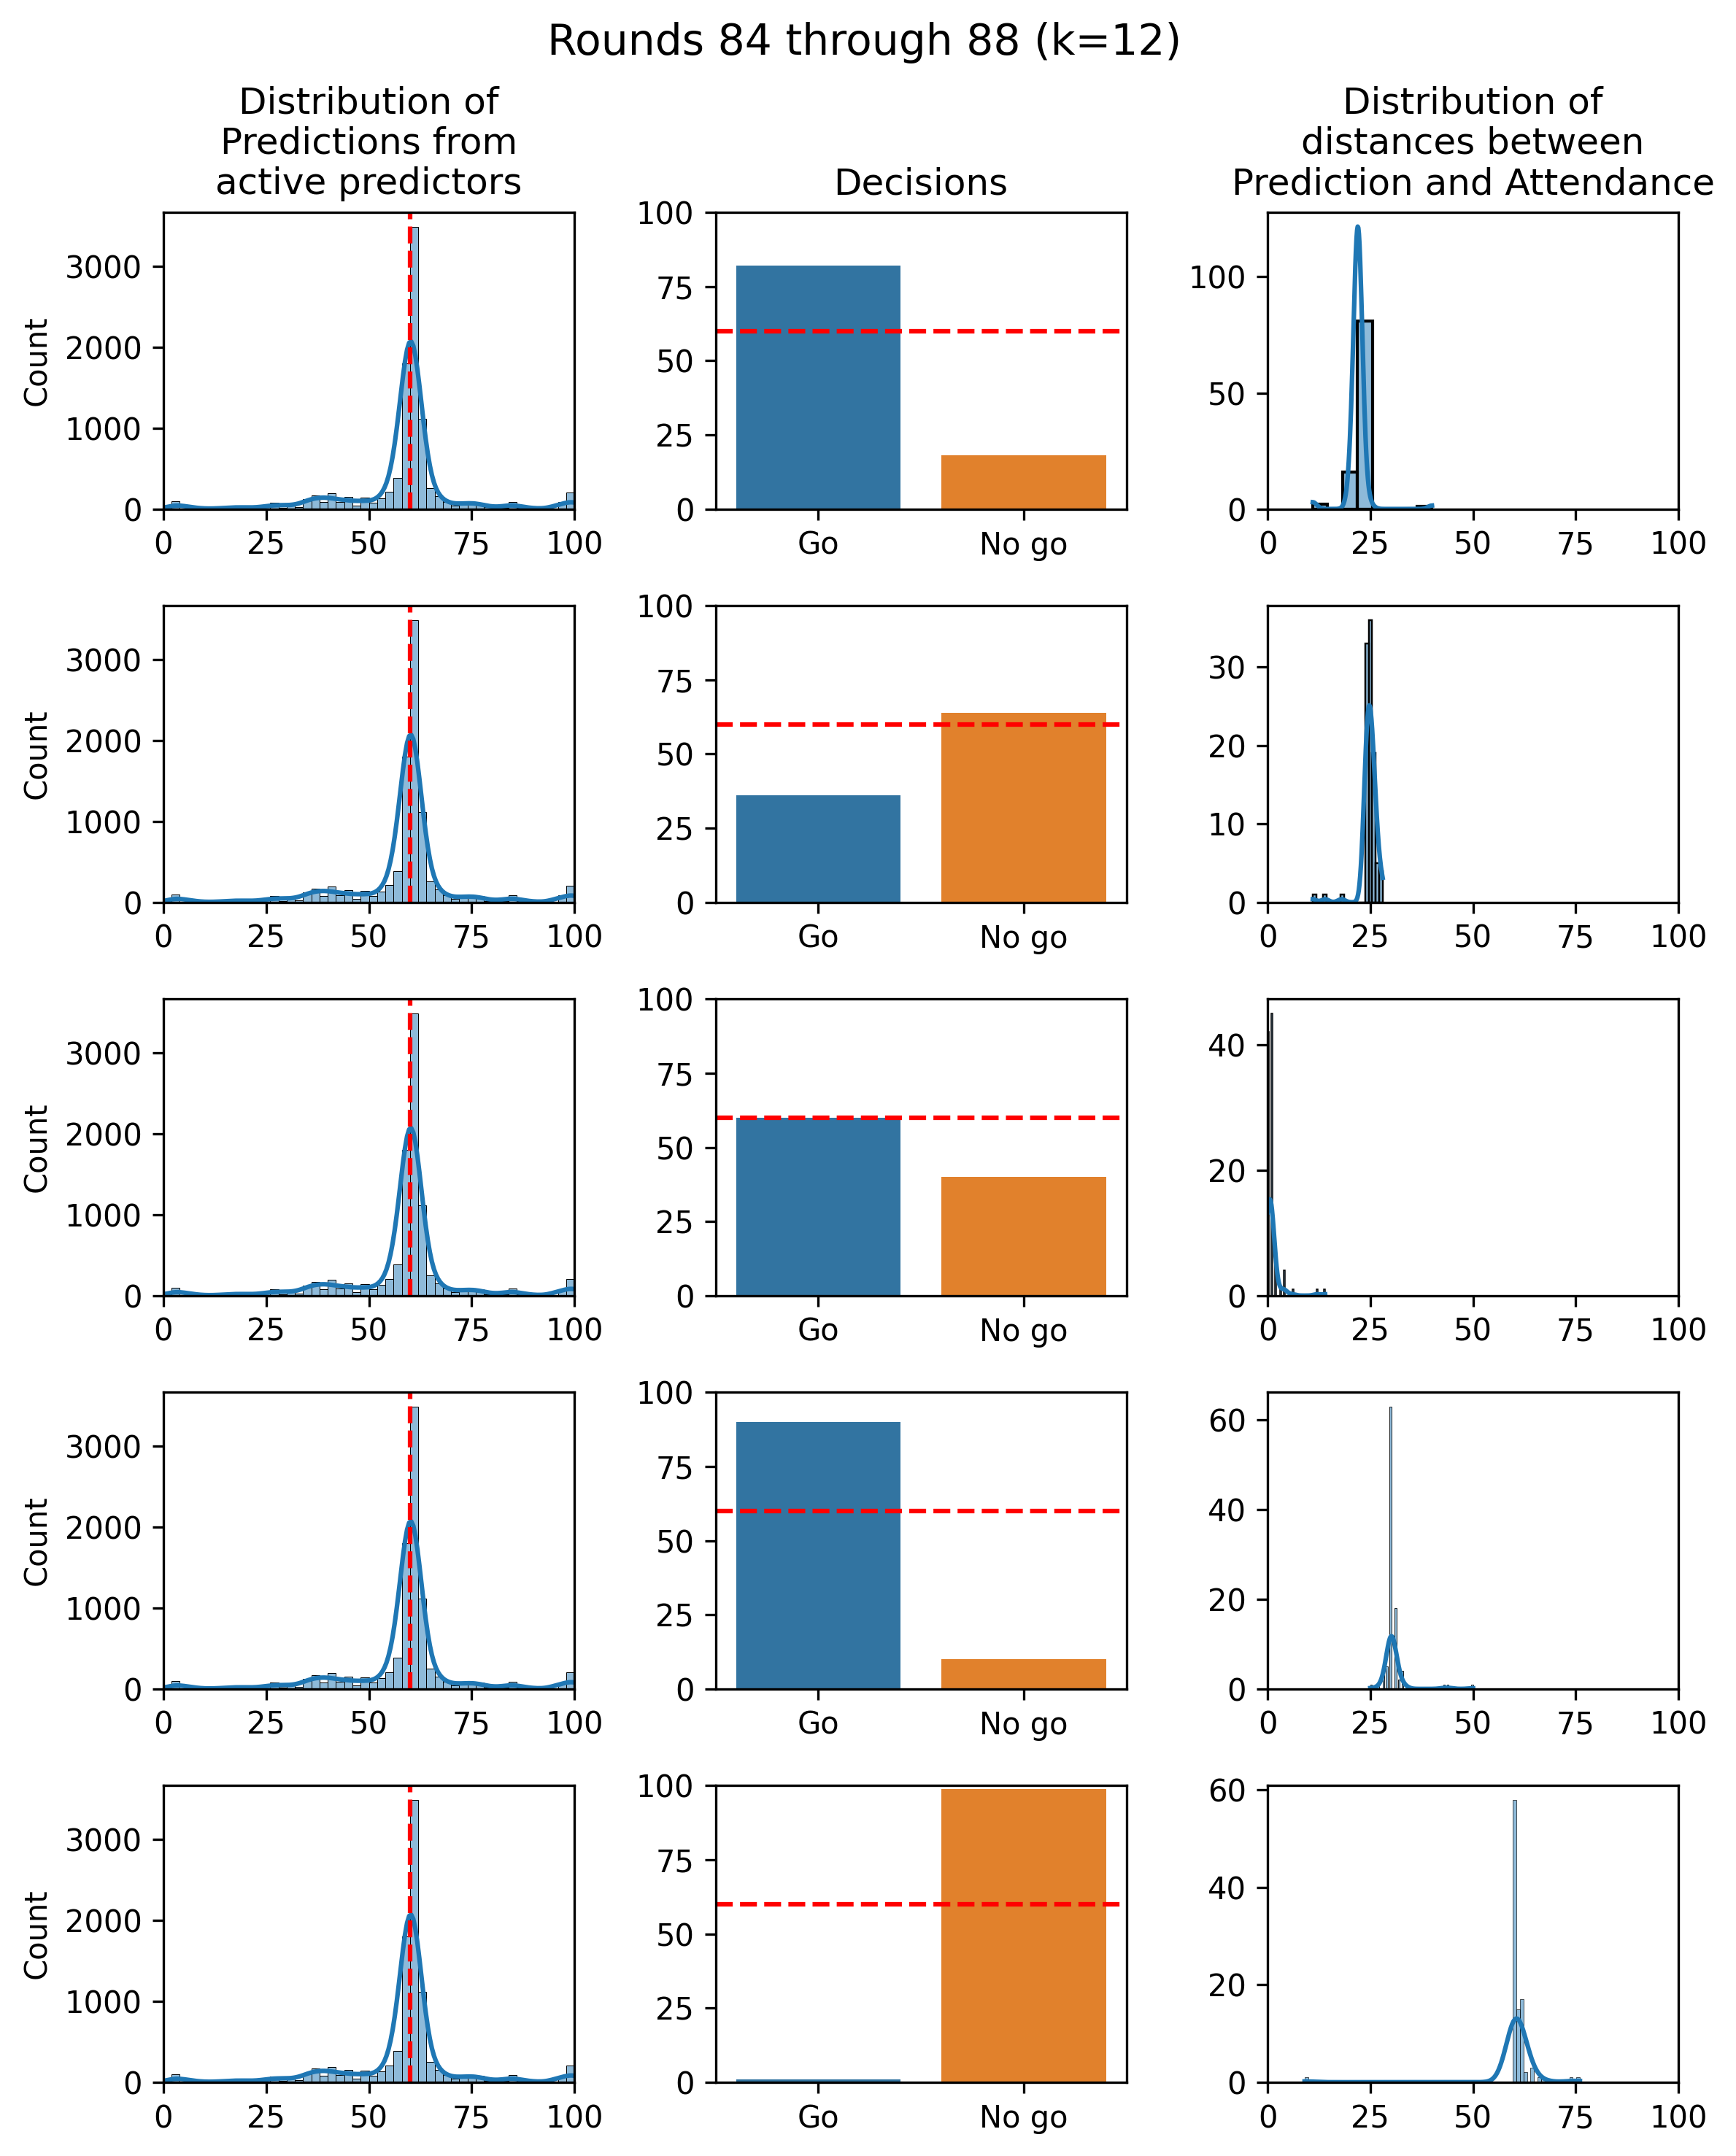

In [ ]:
Figure4(seed=44)

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/1 [00:00<?, ?it/s]

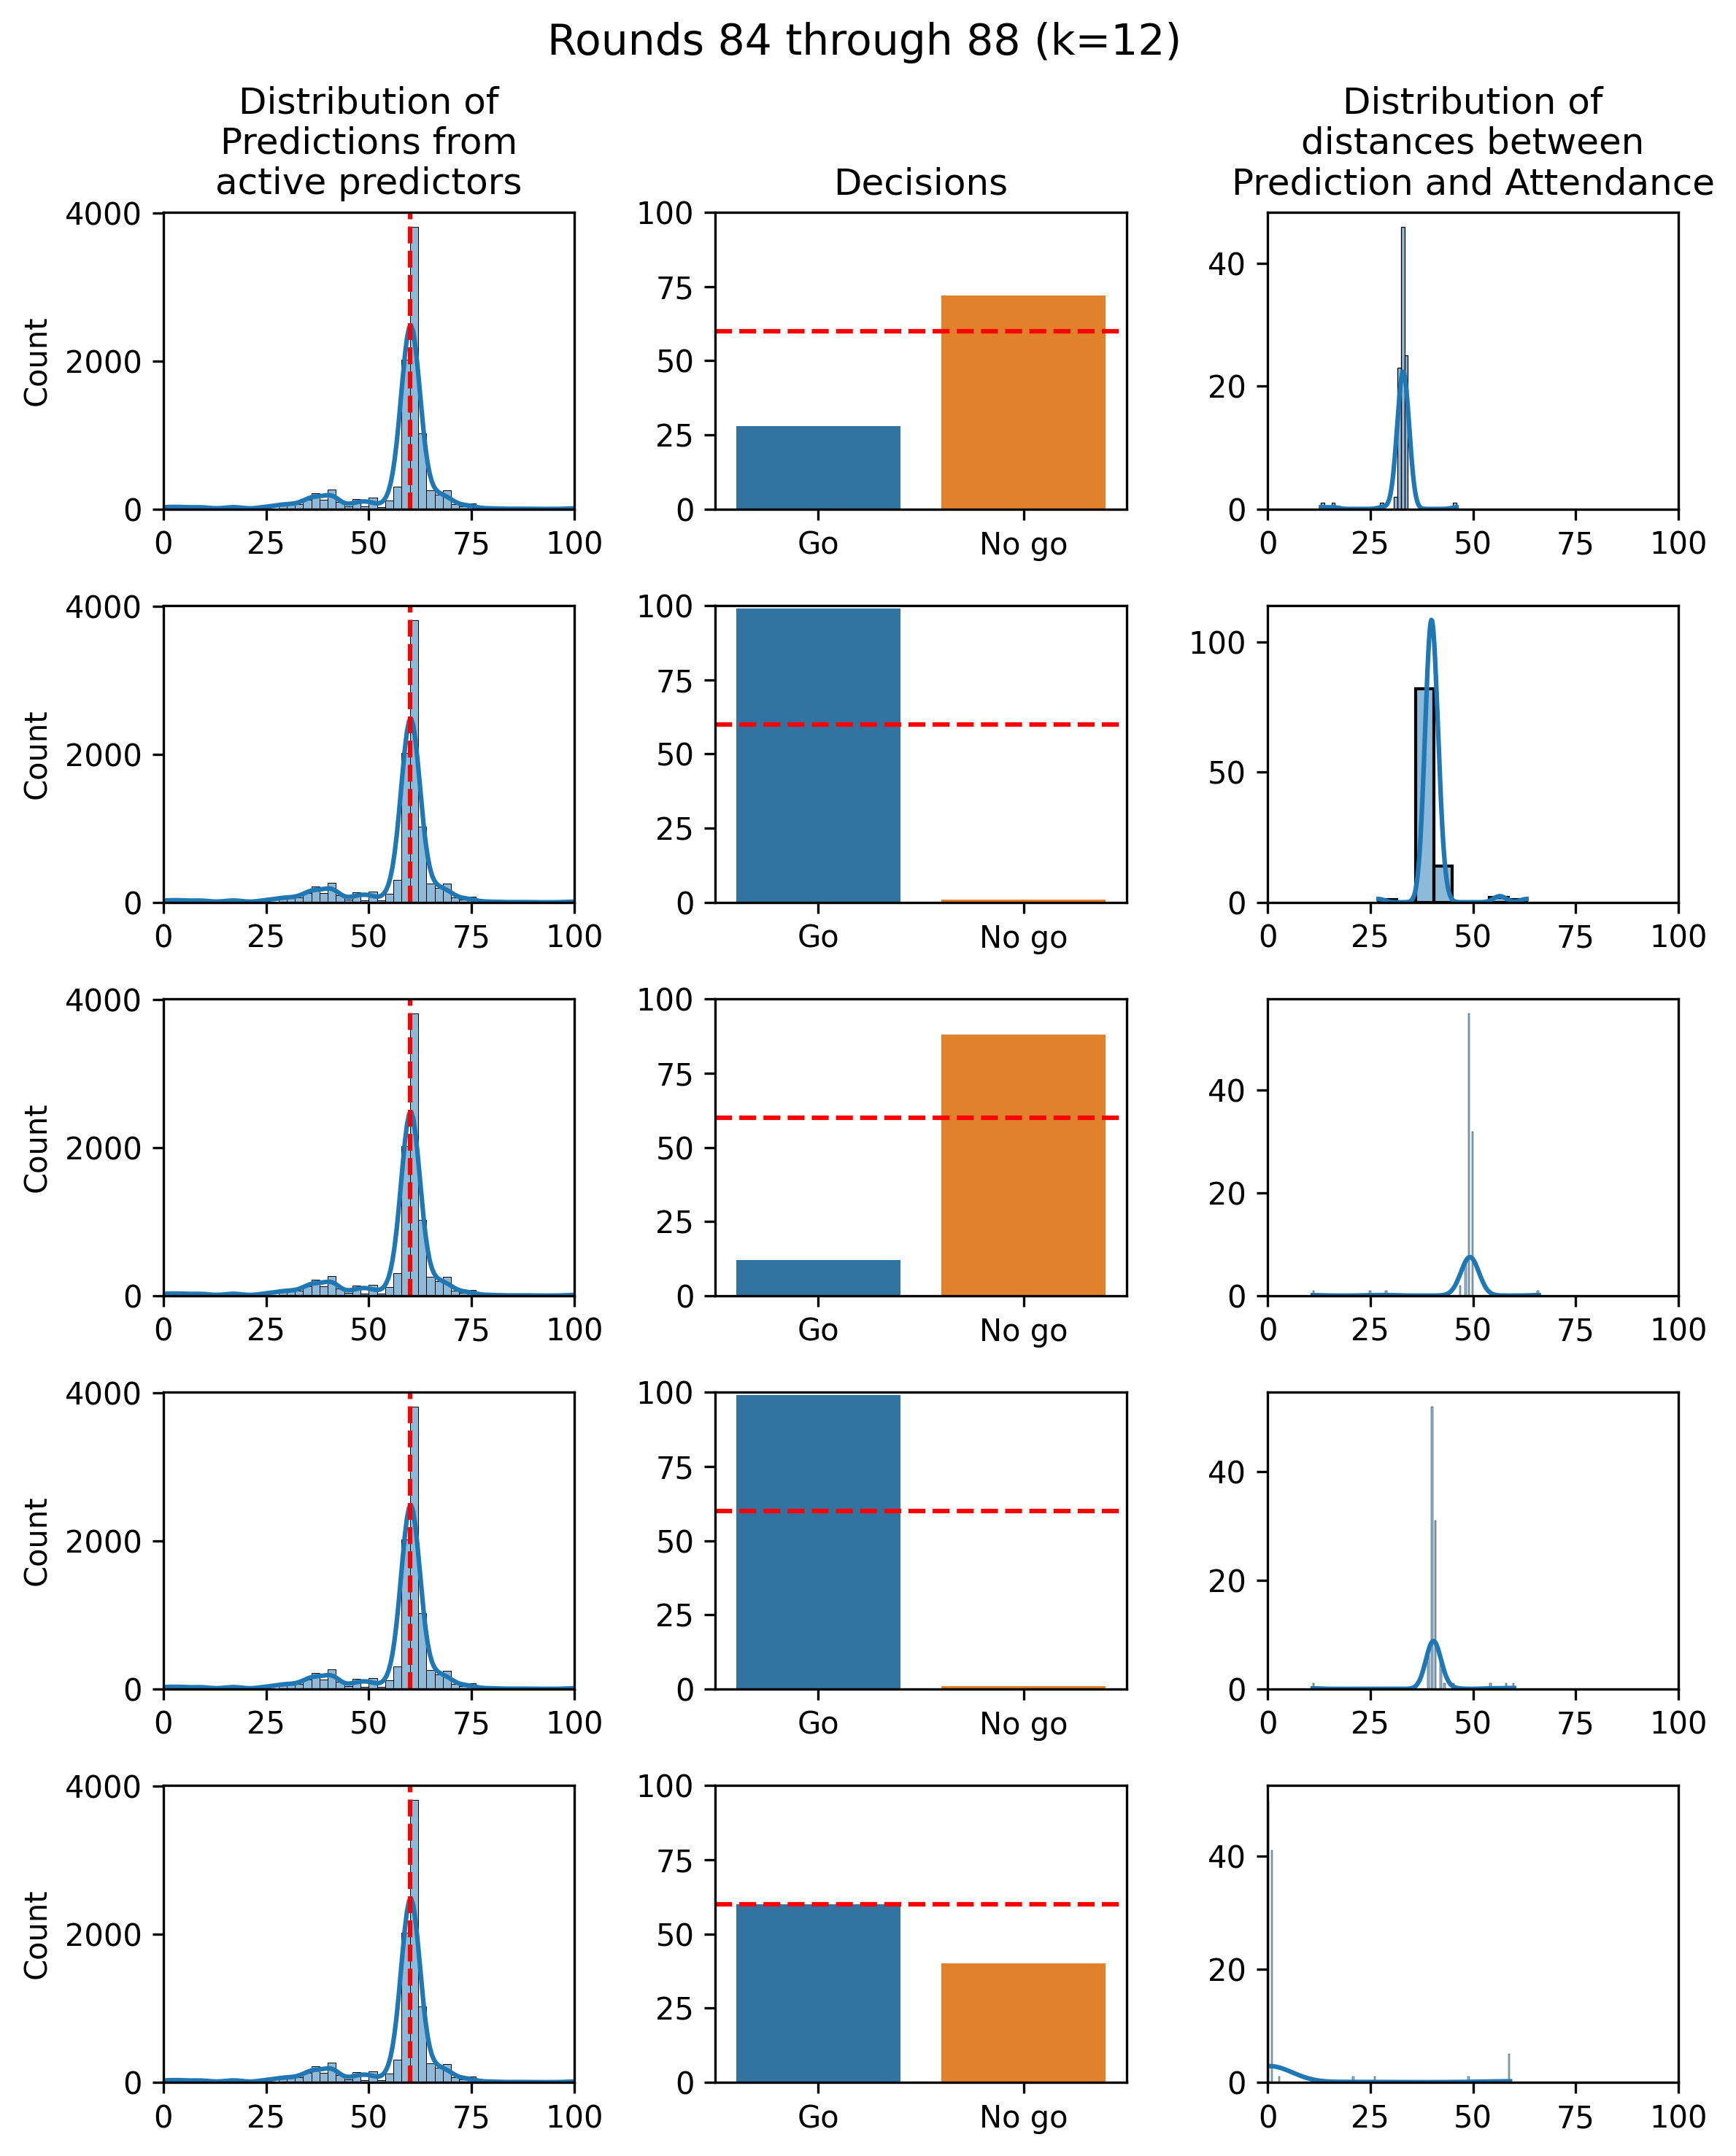

In [8]:
Figure4(seed=47)

---